In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/german_credit_data.csv")

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

<AxesSubplot:>

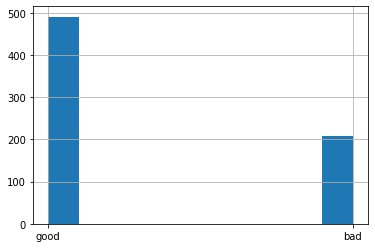

In [5]:
train["Risk"].hist()

In [6]:
train

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
541,541,60,male,2,free,little,NaN,2032,24,car,good
440,440,39,male,3,own,little,NaN,1884,12,car,good
482,482,57,female,2,rent,rich,little,3622,30,furniture/equipment,good
422,422,47,male,1,own,little,moderate,958,12,car,good
778,778,38,male,3,own,rich,NaN,5711,36,car,good
...,...,...,...,...,...,...,...,...,...,...,...
106,106,39,male,3,own,little,NaN,6458,18,car,bad
270,270,32,male,2,own,NaN,NaN,2662,18,car,good
860,860,27,male,2,own,rich,NaN,5804,24,car,good
435,435,25,male,2,own,NaN,moderate,1484,12,radio/TV,bad


<AxesSubplot:xlabel='Risk', ylabel='Age'>

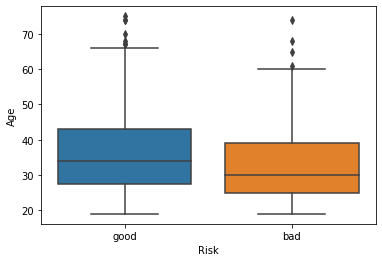

In [7]:
sns.boxplot(data=train, x='Risk', y='Age')

In [8]:
tabla_sexo = pd.crosstab(index=train['Risk'], columns=train['Sex'],margins=True)

In [9]:
tabla_sexo

Sex,female,male,All
Risk,,,
bad,80,129,209
good,142,349,491
All,222,478,700


In [10]:
tabla_sexo.loc["bad", :]/tabla_sexo.loc["All", :]

Sex
female    0.360360
male      0.269874
All       0.298571
dtype: float64

In [11]:
tab = tabla_sexo.loc["bad", :]/tabla_sexo.loc["All", :] 

<AxesSubplot:xlabel='Sex'>

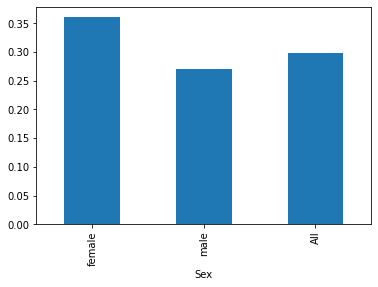

In [12]:
tab.plot(kind='bar')

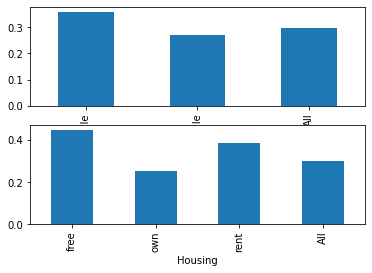

<Figure size 1440x1440 with 0 Axes>

In [13]:
columns = ["Sex", "Housing"]
fig, ax = plt.subplots(len(columns), )
plt.figure(figsize=(20, 20))
for i, c in enumerate(columns):
    tabla = pd.crosstab(index=train['Risk'], columns=train[c],margins=True)
    tab = tabla.loc["bad", :]/tabla.loc["All", :] 
    tab.plot(ax=ax[i], kind='bar')


In [14]:
features = ['Sex', 'Age', 'Credit amount', 'Housing']
y_train = (train['Risk']=='bad').astype('int')
X_train = train[features]

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [16]:
# para transformar datos categóricos en numéricos
encoder = OneHotEncoder()

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
# Estregia para llenar datos que faltan
numericImputer = SimpleImputer(strategy='mean')
categoricImputer = SimpleImputer(strategy='most_frequent')


In [19]:
# Usa MinMaxScaler para que todas las variables estén en la misma escala. En este caso [0, 1]
scaler = MinMaxScaler()

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
# Serie de pasos a aplicar a los datos numéricos
numericPipeline = Pipeline([
    ("imputar_numeros", numericImputer),
    ("escalado", scaler)
])

In [22]:
# Serie de pasos a aplicar a los datos categóricos
categoricalPipeline = Pipeline([
    ("imputar_categorias", categoricImputer),
    ("oneHot", encoder)
])

In [23]:
from sklearn.compose import ColumnTransformer

In [24]:
# indica que pipeline hay que aplicarle a cada columna
transformer =\
ColumnTransformer([("pipeline numerico", numericPipeline, [1, 2]),
                   ("pipeline categorico", categoricalPipeline, [0, 3])
                ])

In [25]:
X_train_transform = transformer.fit_transform(X_train)

In [26]:
X_train_transform

array([[0.73214286, 0.09805216, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.35714286, 0.08990866, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.67857143, 0.18553978, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.14285714, 0.30560141, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.10714286, 0.0678992 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.08928571, 0.03752614, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [27]:
transformer.transform([['male', 46, 2000, 'own']])

c:\godoy\maestria inteligencia artificial\sem2\electiva 2 programación\ex1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\godoy\maestria inteligencia artificial\sem2\electiva 2 programación\ex1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[0.48214286, 0.09629141, 0.        , 1.        , 0.        ,
        1.        , 0.        ]])

In [28]:
import numpy as np

In [29]:
transformer.transform([[np.nan, np.nan, 1000, 'free']])

c:\godoy\maestria inteligencia artificial\sem2\electiva 2 programación\ex1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\godoy\maestria inteligencia artificial\sem2\electiva 2 programación\ex1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[0.29451531, 0.04126775, 0.        , 1.        , 1.        ,
        0.        , 0.        ]])

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train_transform, y_train)

DecisionTreeClassifier(max_depth=4)

In [32]:
from sklearn.tree import plot_tree

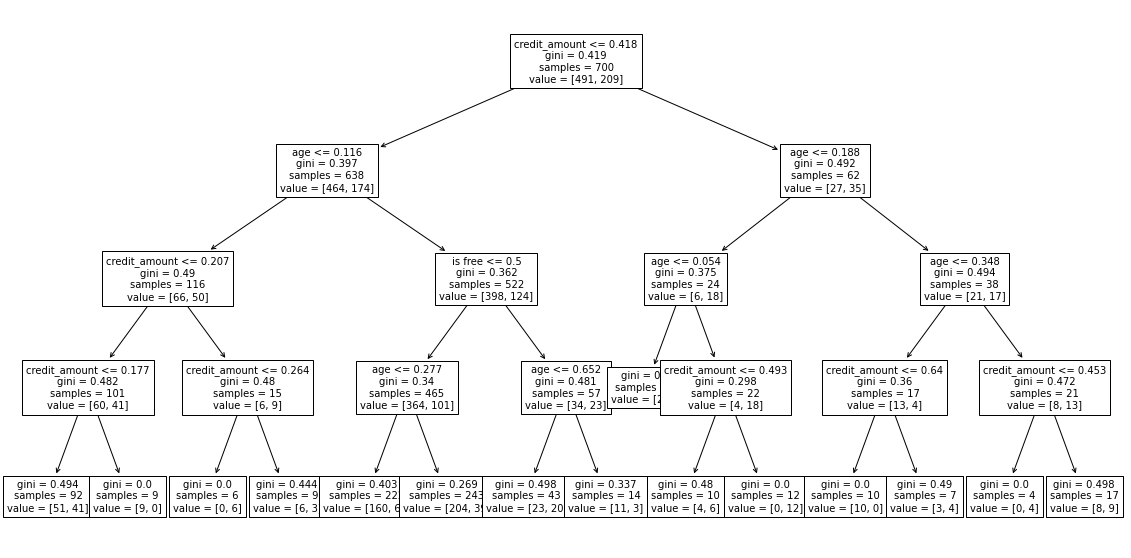

In [33]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=('age', 'credit_amount', 'is female', 'is male','is free', 'is_own', 'is_rent'), fontsize=10)
plt.show()

In [34]:
clf.predict_proba(transformer.transform([['male', 46, 2000, 'own']]))

c:\godoy\maestria inteligencia artificial\sem2\electiva 2 programación\ex1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\godoy\maestria inteligencia artificial\sem2\electiva 2 programación\ex1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[0.83950617, 0.16049383]])

In [35]:
y_train

541    0
440    0
482    0
422    0
778    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Risk, Length: 700, dtype: int32

In [37]:
import joblib

In [39]:
# se guarda el pipeline de transformación como archivo binario
joblib.dump(transformer, "../modelos/pipelines/pipeline1.joblib")

['../modelos/pipelines/pipeline1.joblib']